# Import Library

In [ ]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import json
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
!gdown --id 1Nm2Q4A6UnyxSUIX_QxOWgbzQUmPrKpmh

Downloading...
From: https://drive.google.com/uc?id=1Nm2Q4A6UnyxSUIX_QxOWgbzQUmPrKpmh
To: /content/super-ai-engineer-2021-font-recognition.zip
100% 1.14G/1.14G [00:09<00:00, 120MB/s] 


In [ ]:
!unzip super-ai-engineer-2021-font-recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/set1/2349/gt_text.json  
  inflating: train/set1/2349/image.png  
  inflating: train/set1/235/gt_text.json  
  inflating: train/set1/235/image.png  
  inflating: train/set1/2350/gt_text.json  
  inflating: train/set1/2350/image.png  
  inflating: train/set1/2351/gt_text.json  
  inflating: train/set1/2351/image.png  
  inflating: train/set1/2352/gt_text.json  
  inflating: train/set1/2352/image.png  
  inflating: train/set1/2353/gt_text.json  
  inflating: train/set1/2353/image.png  
  inflating: train/set1/2354/gt_text.json  
  inflating: train/set1/2354/image.png  
  inflating: train/set1/2355/gt_text.json  
  inflating: train/set1/2355/image.png  
  inflating: train/set1/2356/gt_text.json  
  inflating: train/set1/2356/image.png  
  inflating: train/set1/2357/gt_text.json  
  inflating: train/set1/2357/image.png  
  inflating: train/set1/2358/gt_text.json  
  inflating: train/set1/2358/image.png  
  inflating: tra

In [ ]:
train_set1 = sorted(glob.glob('/content/train/set1/*'))
train_set2 = sorted(glob.glob('/content/train/set2/*'))

In [ ]:
data_all = list()

for file in train_set1:
    with open(f'{file}/gt_text.json') as json_file:
        data = json.load(json_file)
        file_path = f'{file}/image.png'
        data_all.append((file_path, data))

for file in train_set2:
    with open(f'{file}/gt_text.json') as json_file:
        data = json.load(json_file)
        file_path = f'{file}/image.png'
        data_all.append((file_path, data))

In [ ]:
train_df = pd.DataFrame(data_all, columns=['image_path', 'json_'])

In [ ]:
print(f'There are Train Dataset: {len(data_all)}')

There are Train Dataset: 4000


In [ ]:
info_list = list()

for idx, file in enumerate(train_set1):
    img = cv2.imread(f'{file}/image.png')
    h, w, _ = img.shape
    info_list.append((train_set1[idx], h,w))

In [ ]:
df = pd.DataFrame(info_list, columns=['idx','height', 'weight'])
df

,idx,height,weight
0,/content/train/set1/1,1684,1191
1,/content/train/set1/10,1684,1191
2,/content/train/set1/100,1531,1191
3,/content/train/set1/1000,1684,1191
4,/content/train/set1/1001,1531,1191
...,...,...,...
2995,/content/train/set1/995,1684,1191
2996,/content/train/set1/996,1531,1191
2997,/content/train/set1/997,1684,1191
2998,/content/train/set1/998,1684,1191


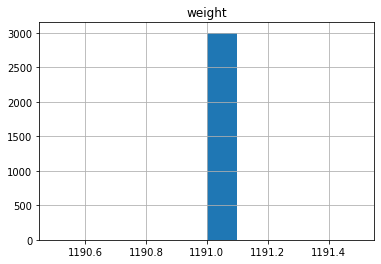

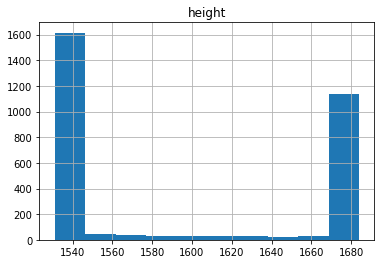

In [ ]:
df['weight'].hist()
plt.title('weight')
plt.show()

df['height'].hist()
plt.title('height')
plt.show()

## Step1: Data Exploration

In [ ]:
# Helper
def visualize(**images):
    """
    Plot image and mask in one row
    """
    n_images = len(images)
    plt.figure(figsize=(40,20))
    for idx, (name, image) in enumerate(images.items()):
        plt.subplot(1, n_images, idx + 1)
        plt.xticks([]); 
        plt.yticks([])
        # get title from the parameter names
        plt.title(name.replace('_',' ').title(), fontsize=20)
        plt.imshow(np.asarray(image), cmap='gray')
    plt.show()

In [ ]:
def drawreg(img_path, json_, cmap=None):
    img = cv2.imread(img_path)
    copy_img = img.copy()

    if cmap is not None:
        gray_img = cv2.imread(img_path, 0)
        copy_img = gray_img.copy()

    for idx, obj in enumerate(json_):
        box_height = obj['rect']['height']
        box_width = obj['rect']['width']
        coor_x = obj['rect']['x']
        coor_y = obj['rect']['y']
        start_point = int(coor_x) ,int(coor_y)
        end_point = int(coor_x + box_width), int(coor_y + box_height)
        copy_img = cv2.rectangle(copy_img, start_point, end_point, (0,0,255), 2)
    return copy_img

def binary_tresh(img_path, thresh=127):
    img = cv2.imread(img_path, 0)
    _,thresh1 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY)
    return thresh1

def adpaptive_thresh(img):
    thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)
    return thresh

Image path: /content/train/set1/1/image.png


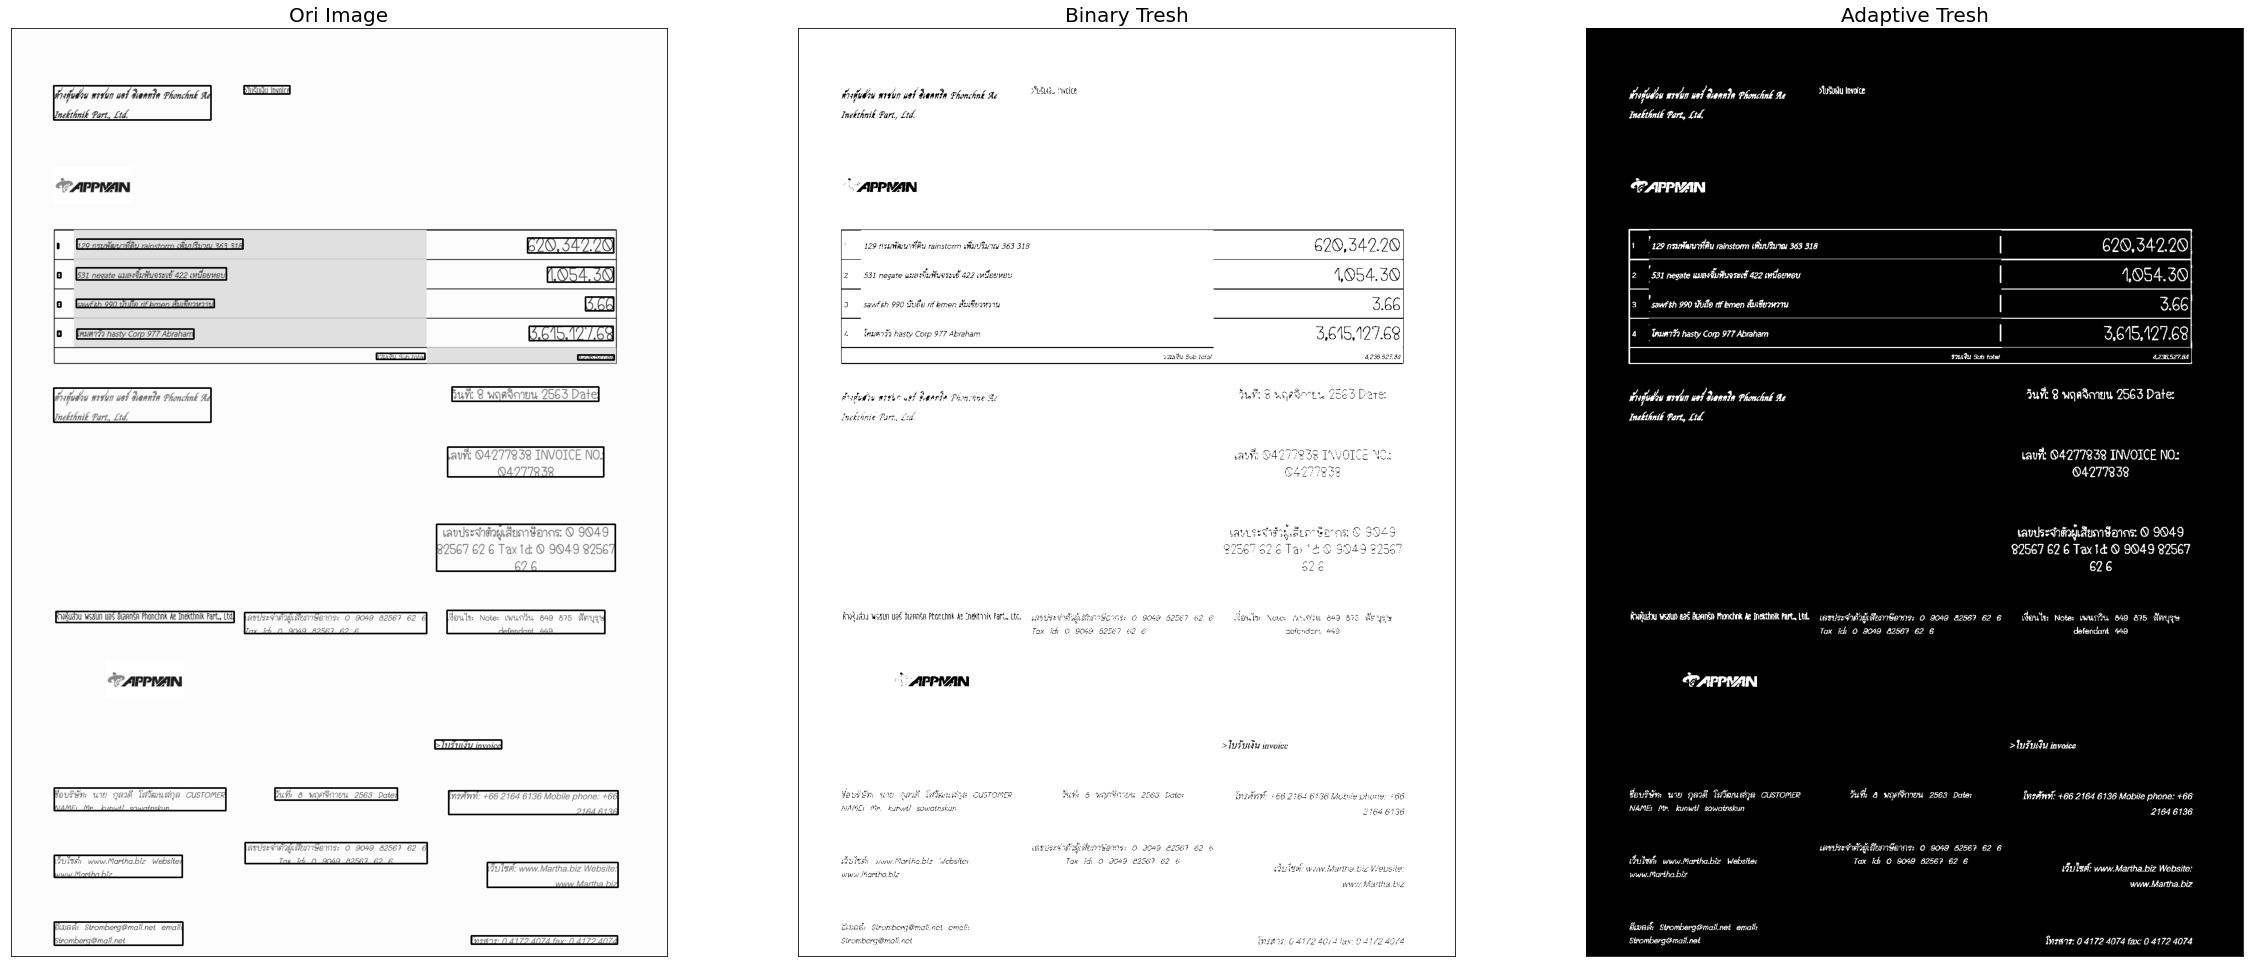

Image path: /content/train/set1/10/image.png


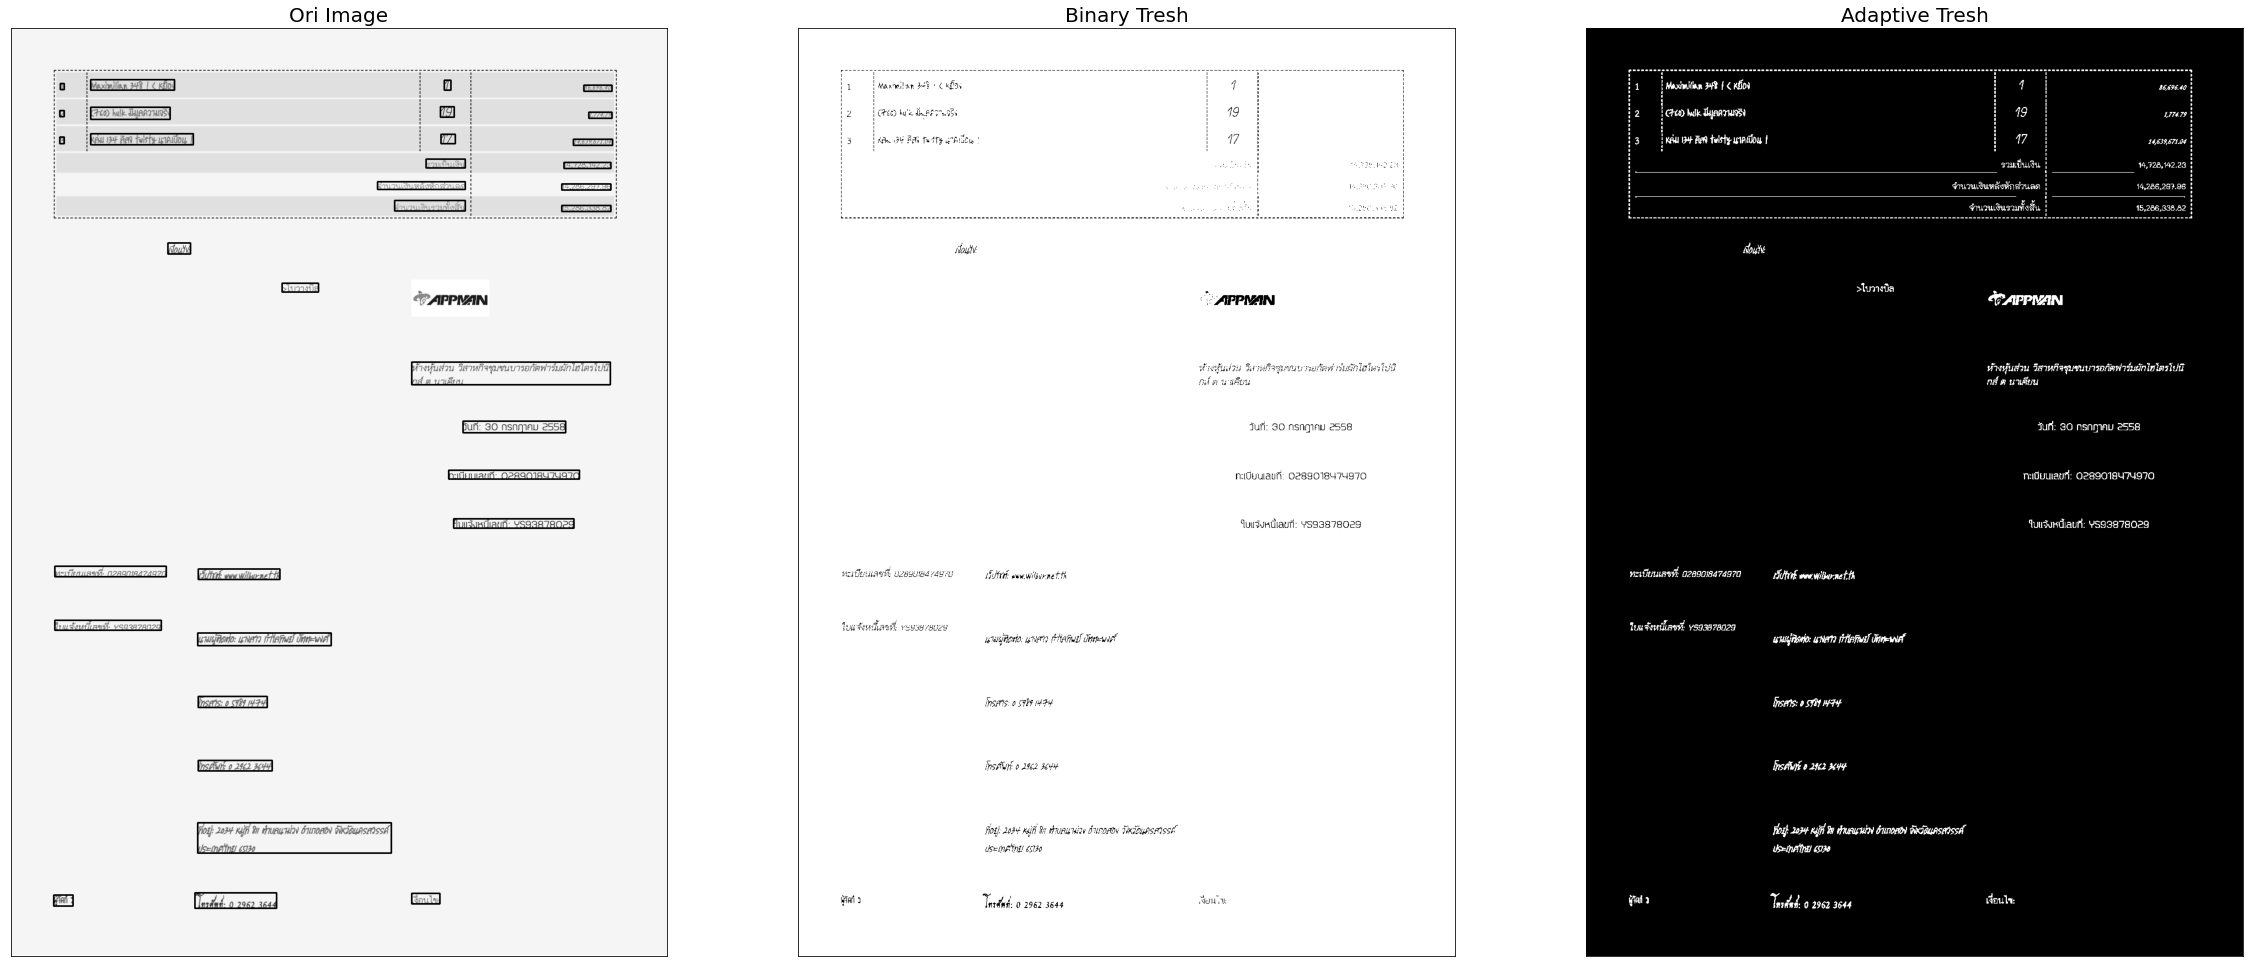

Image path: /content/train/set1/100/image.png


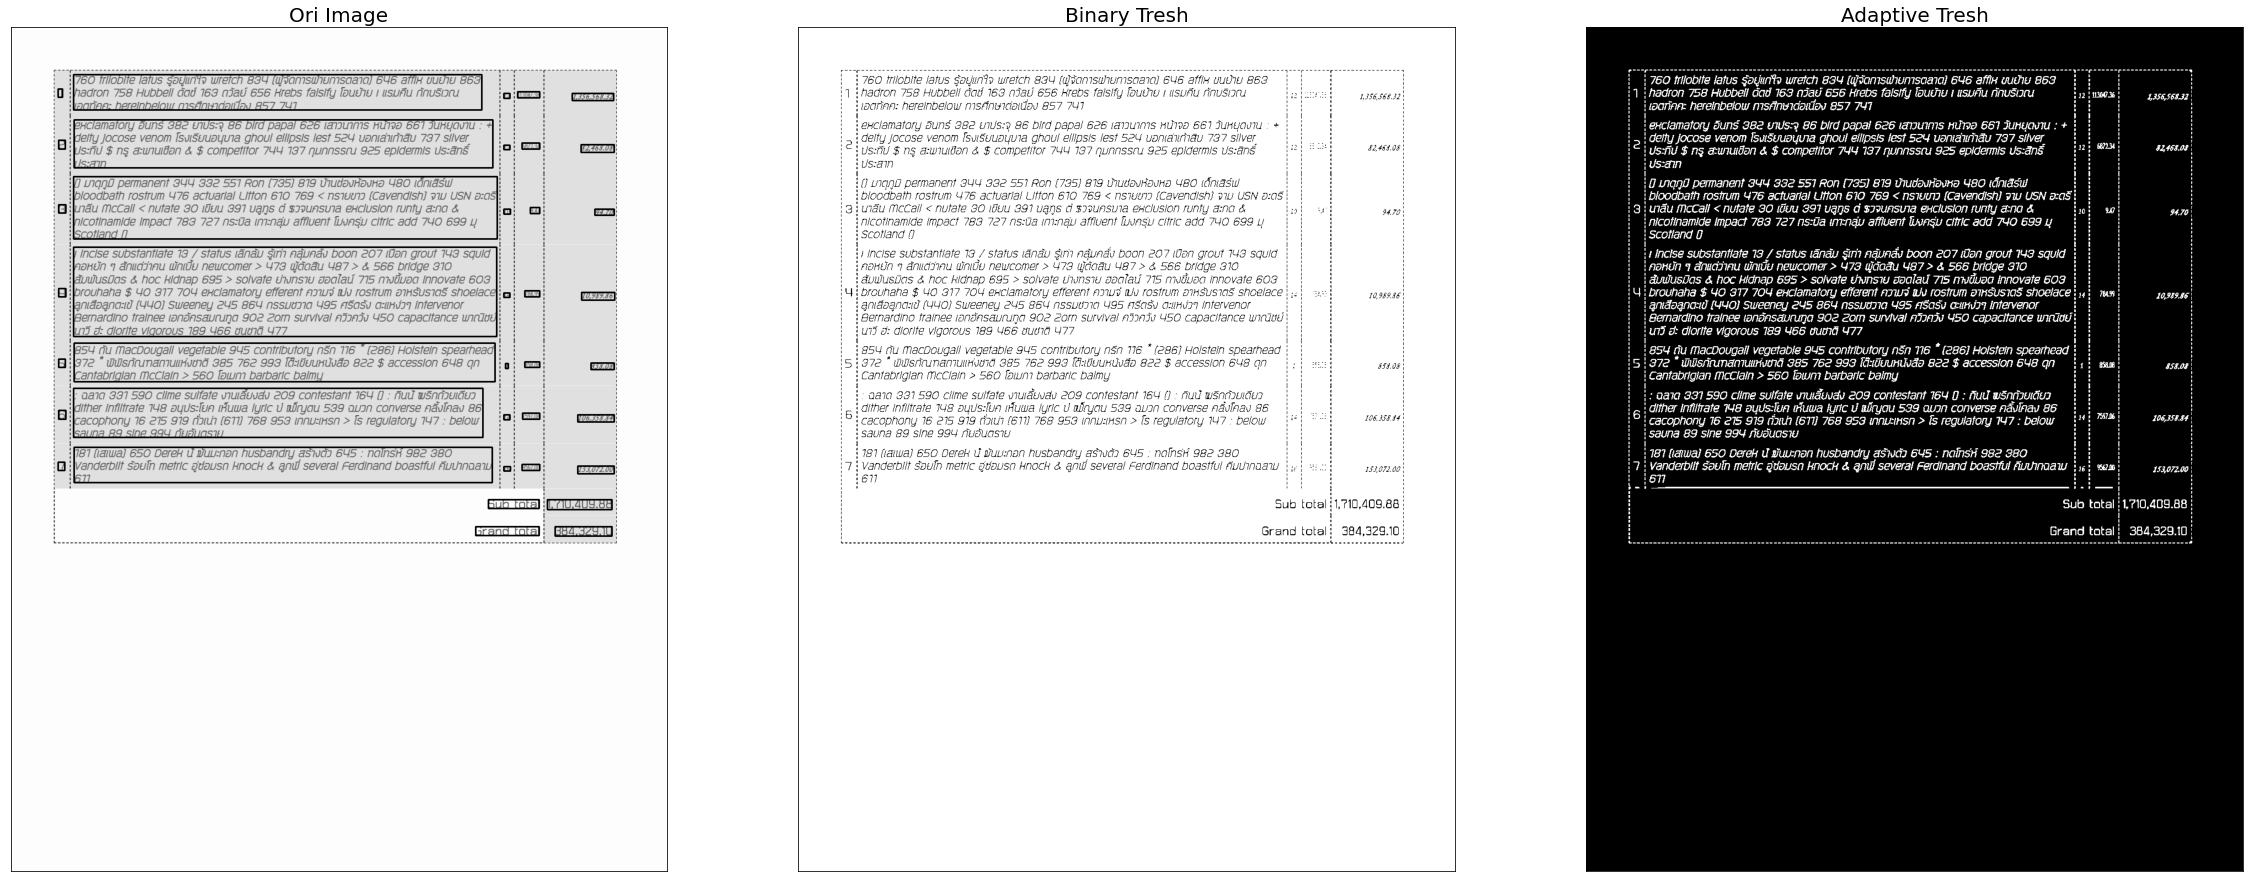

In [ ]:
for idx in range(3):
    img_path = train_df.iloc[idx].image_path
    print(f'Image path: {img_path}')
    json_ = train_df.iloc[idx].json_
    binary_img = binary_tresh(img_path)
    adaptive_img = adpaptive_thresh(img_path)
    
    ori_img = drawreg(img_path, json_, cmap=0)
    visualize(
        ori_image = ori_img,
        binary_tresh = binary_img,
        adaptive_tresh = adaptive_img
    )

In [ ]:
json_[0]

{'parentId': '651a0834',
 'parentWord': 'เงื่อนไข:',
 'rect': {'height': 20.640000343322754,
  'width': 40.60387498140335,
  'x': 284.79778123497965,
  'y': 391.0864683151245},
 'style': {'fontFamily': 'DM_Shining_Star_Regular',
  'fontSize': '16px',
  'fontStyle': 'italic',
  'fontVarient': 'normal',
  'fontWeight': 'normal'},
 'text': 'เงื่อนไข:'}

In [ ]:
json_[0]['rect']['height']

20.640000343322754

## 1.2 Data Preprocessing

In [ ]:
# Note: Find best parameters
# TODO1: The bounding boxs are close to text, so expand the bounding box

def drawreg(img_path, json_, cmap=None):
    img = cv2.imread(img_path)
    copy_img = img.copy()

    if cmap is not None:
        gray_img = cv2.imread(img_path, 0)
        copy_img = gray_img.copy()

    for idx, obj in enumerate(json_):
        box_height = obj['rect']['height']
        box_width = obj['rect']['width']
        coor_x = obj['rect']['x']
        coor_y = obj['rect']['y']
        start_point = int(coor_x-5) ,int(coor_y-5)
        end_point = int(coor_x + box_width+5), int(coor_y + box_height+5)
        copy_img = cv2.rectangle(copy_img, start_point, end_point, (0,0,255), 2)
    return copy_img

In [ ]:
# Note: Find best parameters
# TODO1: The bounding boxs are close to text, so expand the bounding box

def crop(image, json_, count1, cmap=None):
    count = 0
    for idx, obj in enumerate(json_):
        try:
            box_height = obj['rect']['height']
            box_width = obj['rect']['width']
            coor_x = obj['rect']['x']
            coor_y = obj['rect']['y']
            start_point = int(coor_x) ,int(coor_y)
            end_point = int(coor_x + box_width), int(coor_y + box_height)
            crop_img = image[start_point[1]-5:end_point[1]+5, start_point[0]-5:end_point[0]+5]
            save_path = f'/content/image/{count1}_{count}.png'
            cv2.imwrite(save_path, crop_img)
            count = count + 1
        except Exception as err:
            print('Error image')
    return crop_img

Image path: /content/train/set1/1/image.png
Error image
Error image


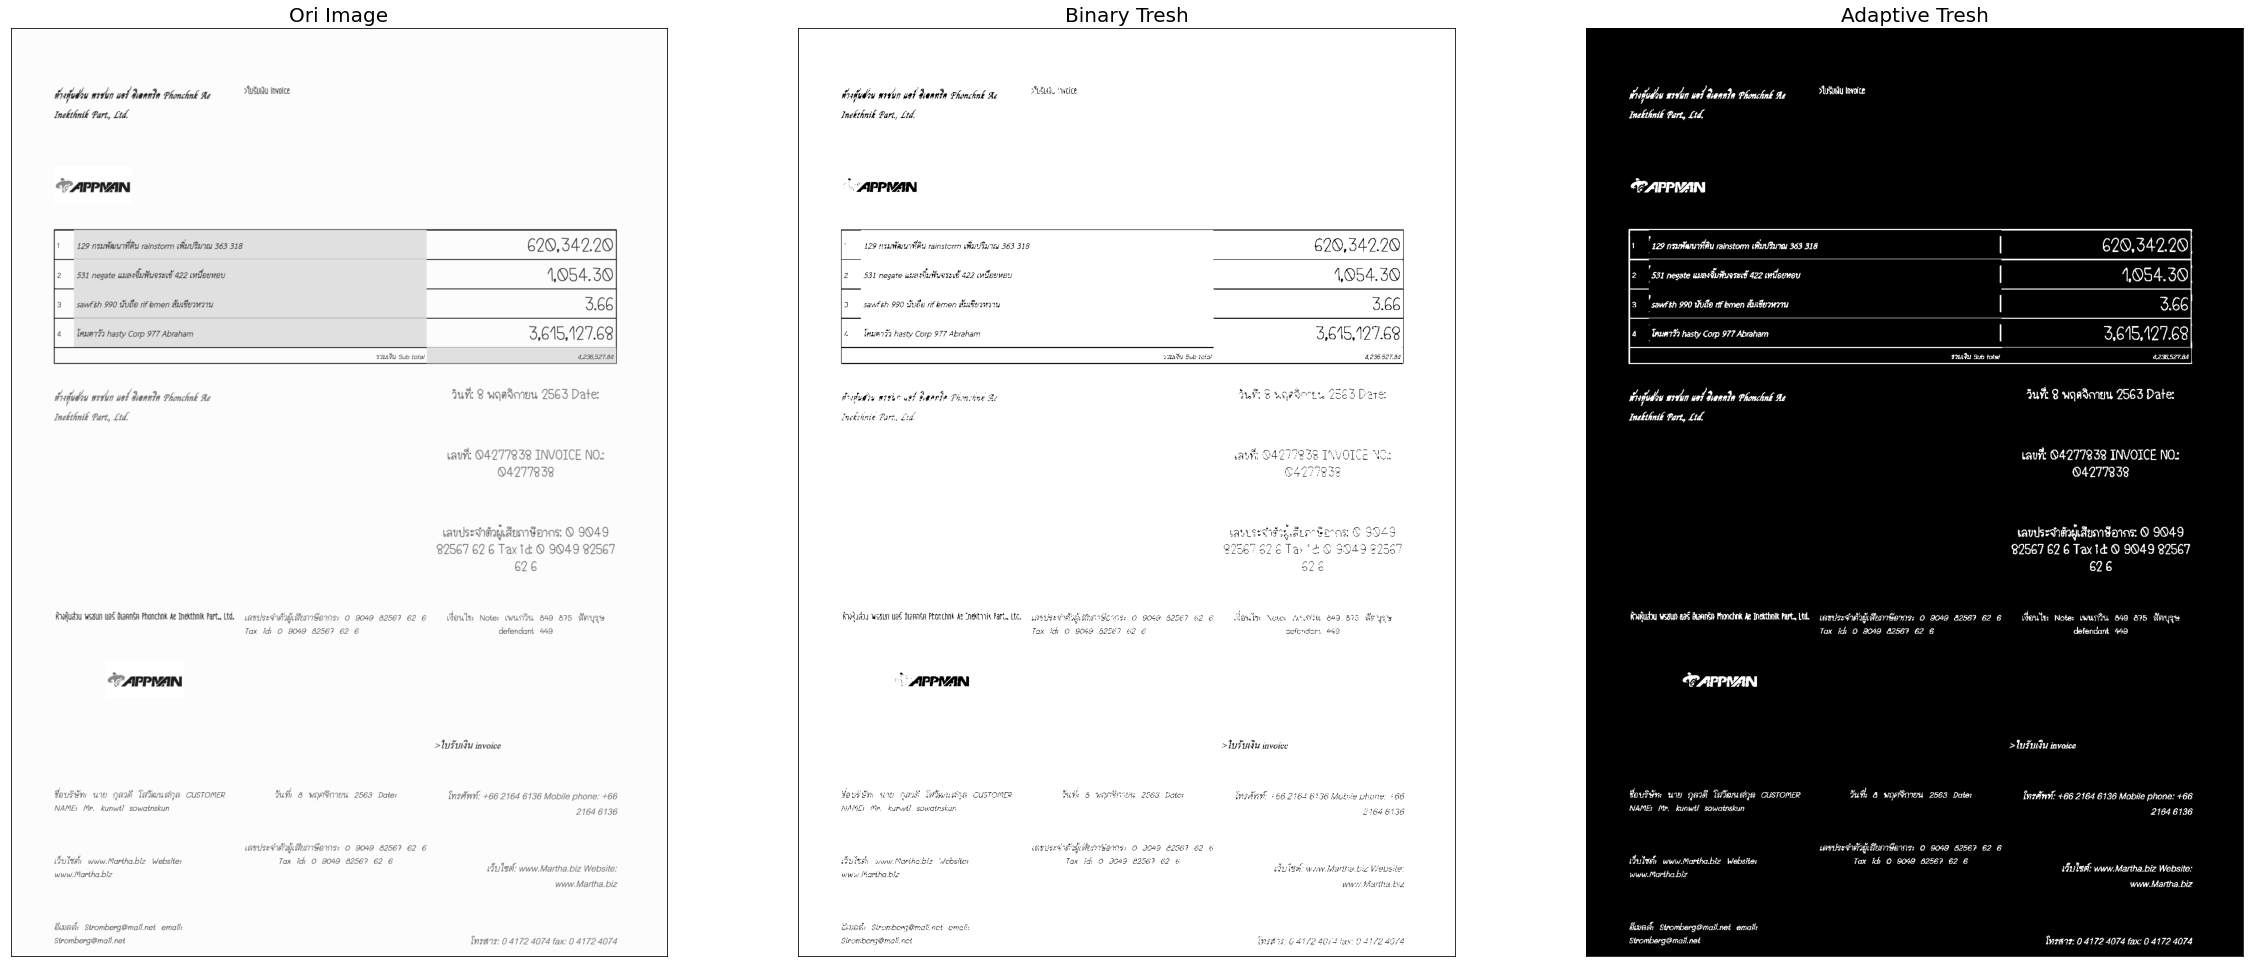

Image path: /content/train/set1/10/image.png
Error image
Error image
Error image
Error image


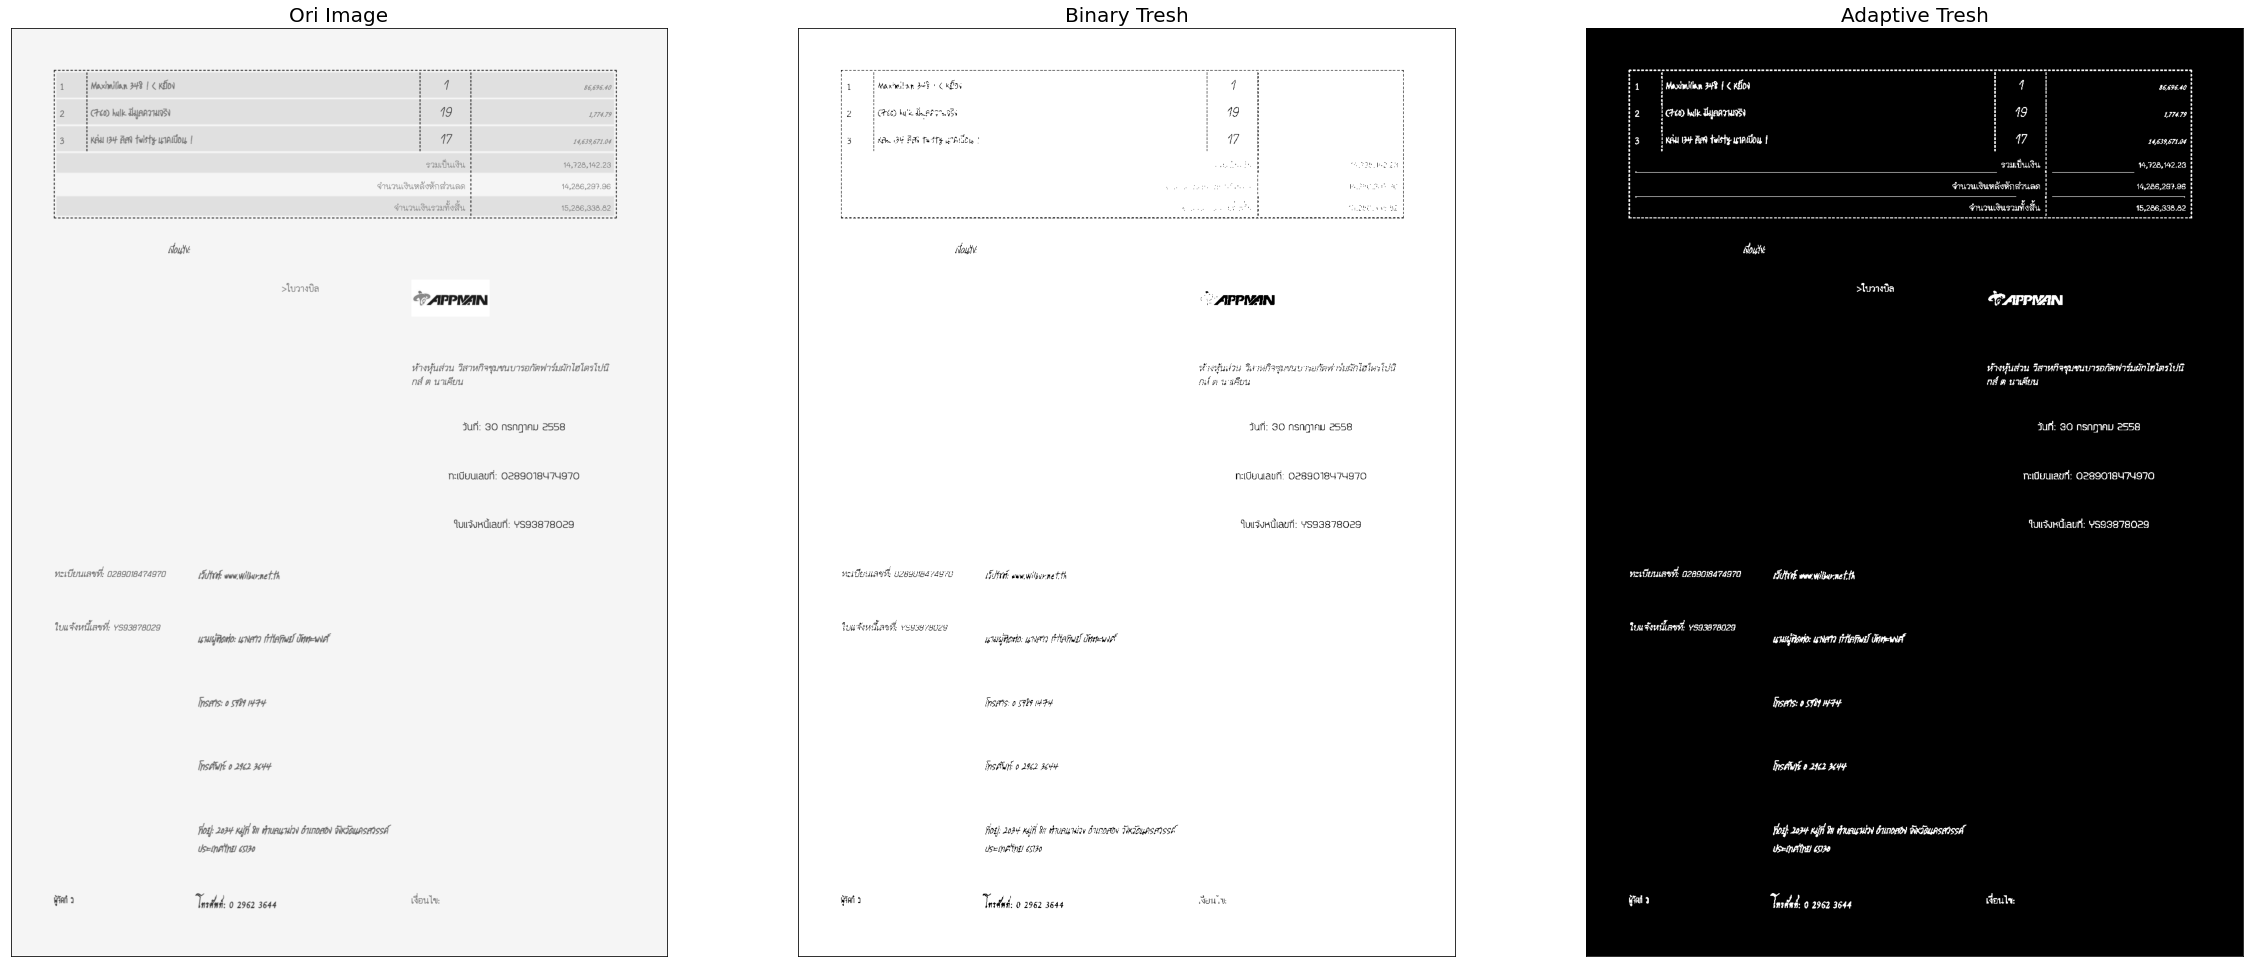

Image path: /content/train/set1/100/image.png


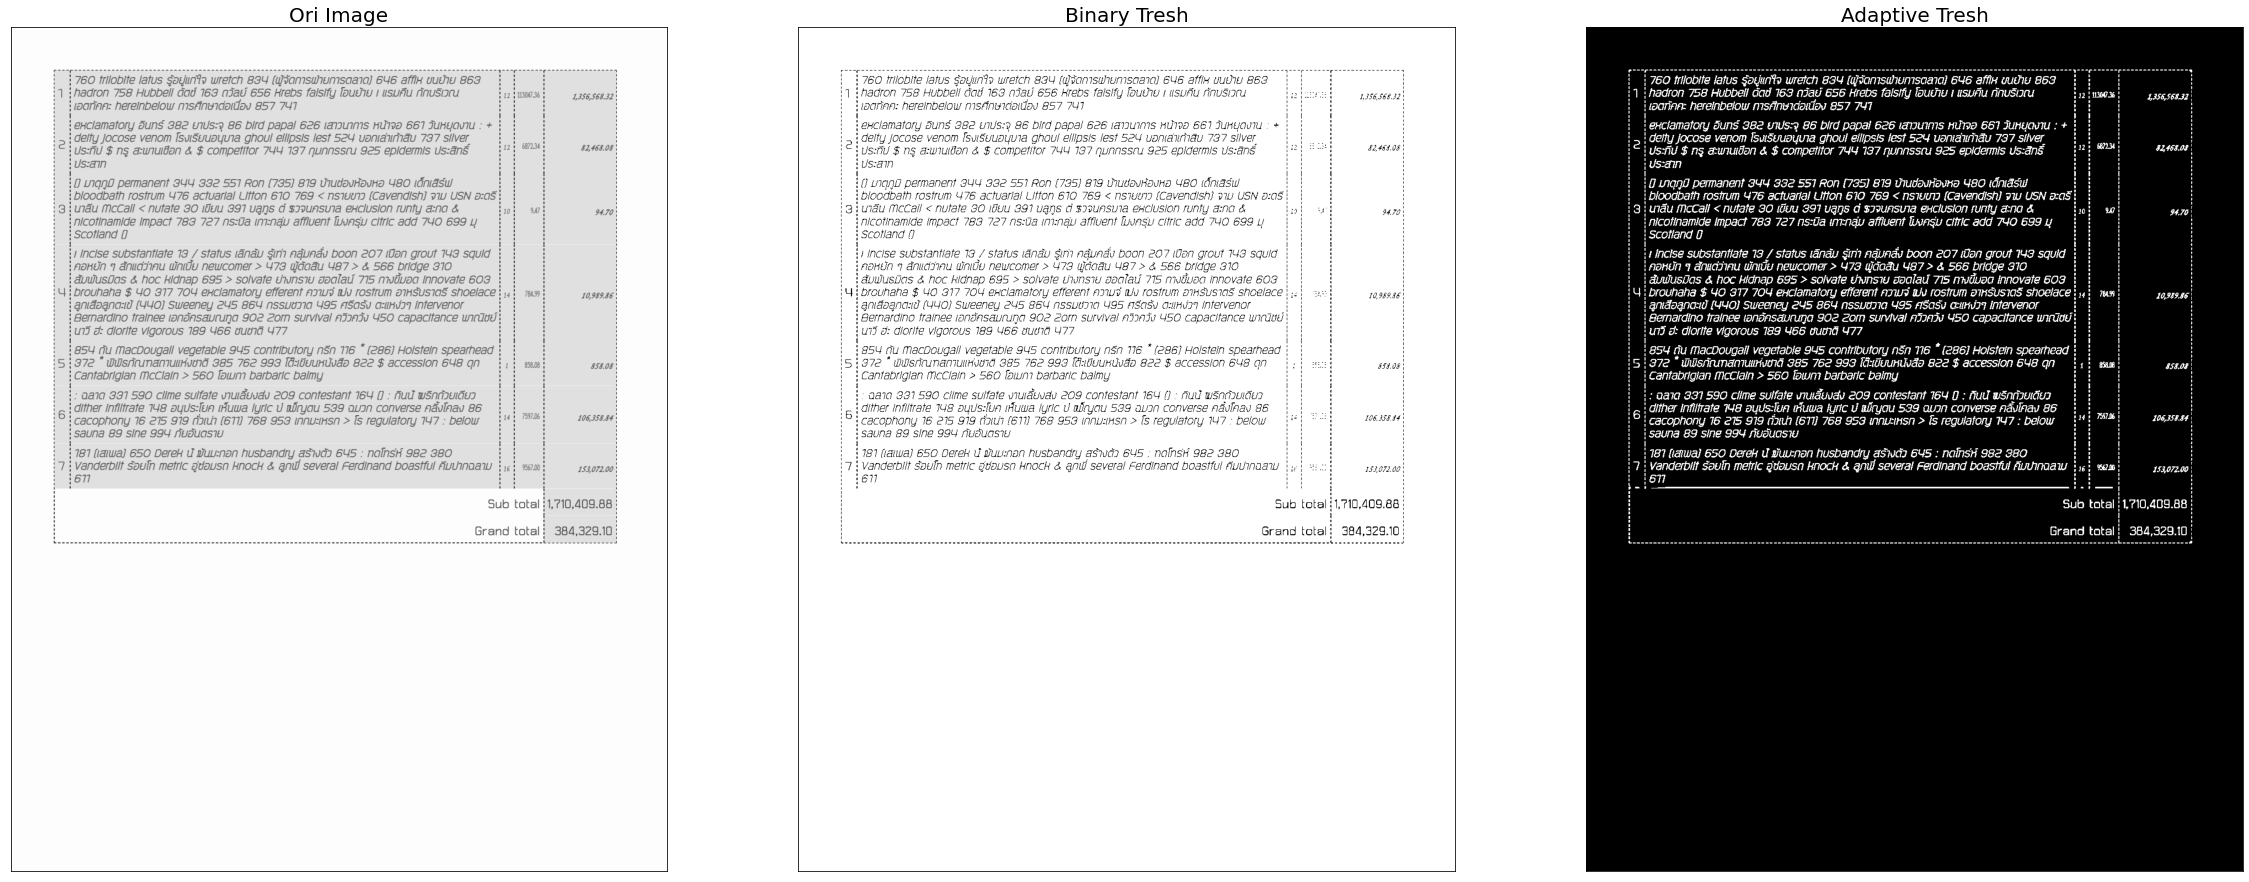

In [ ]:
# TODO2: Crop bounding box of adaptive threshold
count1 = -1
for idx in range(3):
    
    img_path = train_df.iloc[idx].image_path
    print(f'Image path: {img_path}')
    json_ = train_df.iloc[idx].json_
    binary_img = binary_tresh(img_path)
    
    ori_img = cv2.imread(img_path,0)
    # ori_img = drawreg(img_path, json_, cmap=0)
    adaptive_thresh = adpaptive_thresh(ori_img)
    count1 = count1 +1
    crop_img = crop(adaptive_thresh, json_, count1, cmap=0)

    visualize(
        ori_image = ori_img,
        binary_tresh = binary_img,
        adaptive_tresh = adaptive_thresh
        
    )

    
    
  # TODO3: Save to folder
    

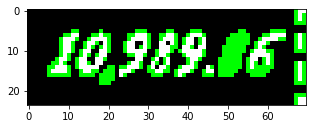

In [ ]:
image = cv2.imread('/content/image/2_19.png')
from matplotlib.pyplot import figure

# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray, (3,3), 0)
canny = cv2.Canny(image, 120, 255, 1)

cnts = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 1
image_number = 0
copy_img = image.copy()
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 1)
        ROI = image[y:y+h, x:x+w]
        cv2.imwrite("ROI_{}.png".format(image_number), ROI)
        image_number += 1
figure(figsize=(5,5))
cv2.drawContours(copy_img, cnts, -1, (0, 255, 0), 1)

plt.imshow( copy_img)


In [ ]:
len(cnts)

31

In [ ]:
cnts[0]

array([[[67, 21]],

       [[67, 23]],

       [[67, 22]],

       [[68, 21]],

       [[69, 21]]], dtype=int32)